In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import ExcelWriter
from pandas import ExcelFile
import glob
import pywt
from scipy import signal
from termcolor import colored
%matplotlib inline

# creating 3d plot using matplotlib 
# in python
  
# for creating a responsive plot
%matplotlib widget
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

C:\Users\rezan\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#pip install termcolor

# Data Upload

In [3]:
def convert_trc_to_csv(filename):
    # Read the file as text file
    f = open(filename, 'r', encoding='cp949')
    content = f.read()
    f.close()

    # Process rows
    start_line = 18
    raw_data = content.split('\n')[start_line:]
    raw_data = list(map(lambda r: r.strip().split()[1:], raw_data))[:-1]
    raw_data = content.split('\n')[18:]
    raw_data = list(map(lambda r: r.strip().split()[1:], raw_data))

    # Convert to pandas
    df = pd.DataFrame(raw_data, columns=columns)
    df['Time'] = df['Time'].astype('float')

    # Change the file extension to csv
    csv_file = filename.split('.')

In [4]:
filename = "CAR_DATASET.trc"
f = open(filename, 'r', encoding='cp949')
content = f.read()
type(content)

str

In [5]:
raw_data = content.split('\n')[18:]
raw_data = list(map(lambda r: r.strip().split()[1:], raw_data))
raw_data

[['2.1', 'Rx', '0018', '8', '00', '00', '00', '60', '00', '20', '20', '00'],
 ['2.3', 'Rx', '0165', '8', '10', '98', '81', '00', '00', '00', '00', '09'],
 ['2.5', 'Rx', '02B0', '5', '35', 'FD', '0B', '07', '80'],
 ['3.0', 'Rx', '04B1', '8', 'AA', '1E', '29', 'A8', '00', '00', '00', '99'],
 ['3.3', 'Rx', '0164', '8', '00', '08', '01', '00', '00', '00', '07', '0E'],
 ['5.3', 'Rx', '0316', '8', '05', '22', '7E', '0C', '22', '13', '07', '7F'],
 ['5.5', 'Rx', '018F', '8', '00', '28', '22', '00', '00', '52', '00', '10'],
 ['5.7', 'Rx', '0260', '8', '05', '22', '00', '30', '41', '95', '55', '16'],
 ['6.0', 'Rx', '0080', '8', '00', '17', '7E', '0C', '22', '13', '22', 'CF'],
 ['6.2', 'Rx', '0081', '8', '80', '84', '65', '00', '00', '00', '00', '2F'],
 ['6.5', 'Rx', '02A0', '8', '62', '00', '65', '1F', 'AA', '23', '0B', '09'],
 ['6.7', 'Rx', '0329', '8', '0F', 'B0', '80', '8C', '12', '2D', '00', '10'],
 ['6.9', 'Rx', '0382', '8', '40', 'FE', '0F', '00', '00', '00', '00', '04'],
 ['7.2', 'Rx', '0

In [6]:
columns = ['Time', 'Type', 'CAN_ID', 'DLC']
columns += [f'Data{x}' for x in range(8)]
columns

['Time',
 'Type',
 'CAN_ID',
 'DLC',
 'Data0',
 'Data1',
 'Data2',
 'Data3',
 'Data4',
 'Data5',
 'Data6',
 'Data7']

In [7]:
Car_Data_Frame = pd.DataFrame(raw_data, columns=columns)
Car_Data_Frame['Time'] = Car_Data_Frame['Time'].astype('float')
Car_Data_Frame = Car_Data_Frame[:len(Car_Data_Frame)-1]
Car_Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266836 entries, 0 to 1266835
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Time    1266836 non-null  float64
 1   Type    1266836 non-null  object 
 2   CAN_ID  1266836 non-null  object 
 3   DLC     1266836 non-null  object 
 4   Data0   1266836 non-null  object 
 5   Data1   1266836 non-null  object 
 6   Data2   1263871 non-null  object 
 7   Data3   1257943 non-null  object 
 8   Data4   1251414 non-null  object 
 9   Data5   1192134 non-null  object 
 10  Data6   1192134 non-null  object 
 11  Data7   1192134 non-null  object 
dtypes: float64(1), object(11)
memory usage: 116.0+ MB


In [8]:
Car_Data_Frame['Full_Data_Time_Gap'] = Car_Data_Frame['Time'].diff(1)
Car_Data_Frame

,Time,Type,CAN_ID,DLC,Data0,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Full_Data_Time_Gap
0,2.1,Rx,0018,8,00,00,00,60,00,20,20,00,NaN
1,2.3,Rx,0165,8,10,98,81,00,00,00,00,09,0.2
2,2.5,Rx,02B0,5,35,FD,0B,07,80,None,None,None,0.2
3,3.0,Rx,04B1,8,AA,1E,29,A8,00,00,00,99,0.5
4,3.3,Rx,0164,8,00,08,01,00,00,00,07,0E,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266831,592811.0,Rx,0329,8,40,B0,80,8C,12,2E,00,10,0.3
1266832,592811.2,Rx,0370,8,FF,26,10,88,FF,00,00,B0,0.2
1266833,592811.4,Rx,0392,8,06,91,08,5B,00,C6,00,C0,0.2
1266834,592811.7,Rx,0018,8,00,00,00,60,00,00,20,00,0.3


# Overall Time Gap Change In Full Data Set

Text(0.5, 1.0, 'Data Cangeing Pattern According to Time Gap')

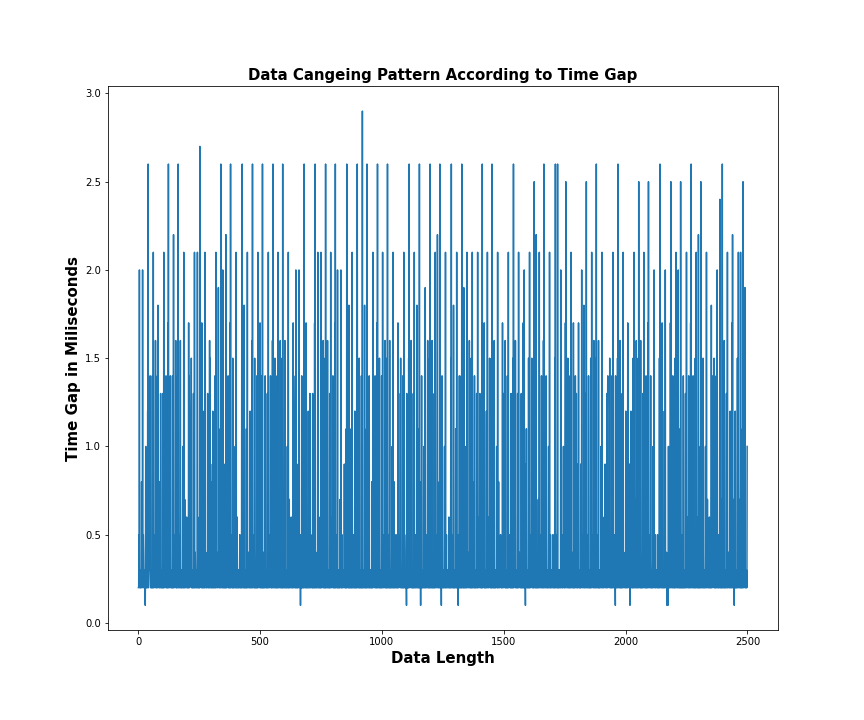

In [60]:
plt.subplots(figsize = (12, 10))
plt.plot(Car_Data_Frame['Full_Data_Time_Gap'][:2500])
plt.xlabel("Data Length", fontsize=15,  weight='bold')
plt.ylabel("Time Gap in Miliseconds", fontsize=15,  weight='bold')
plt.title("Data Cangeing Pattern According to Time Gap", fontsize=15,  weight='bold')

# Data Sliceing

In [10]:
lower_limit = 2000 #Parameter Input lower value
upper_limit = 2500 #Parameter Input higher value
column = 'Full_Data_Time_Gap' #Selecting the column

In [11]:
Car_Data_Frame[column][lower_limit:upper_limit]

2000    0.2
2001    1.2
2002    0.3
2003    0.2
2004    0.2
       ... 
2495    0.2
2496    0.3
2497    0.2
2498    0.2
2499    1.0
Name: Full_Data_Time_Gap, Length: 500, dtype: float64

Text(0.5, 1.0, 'Sliced Data Cangeing Pattern According to Time Gap')

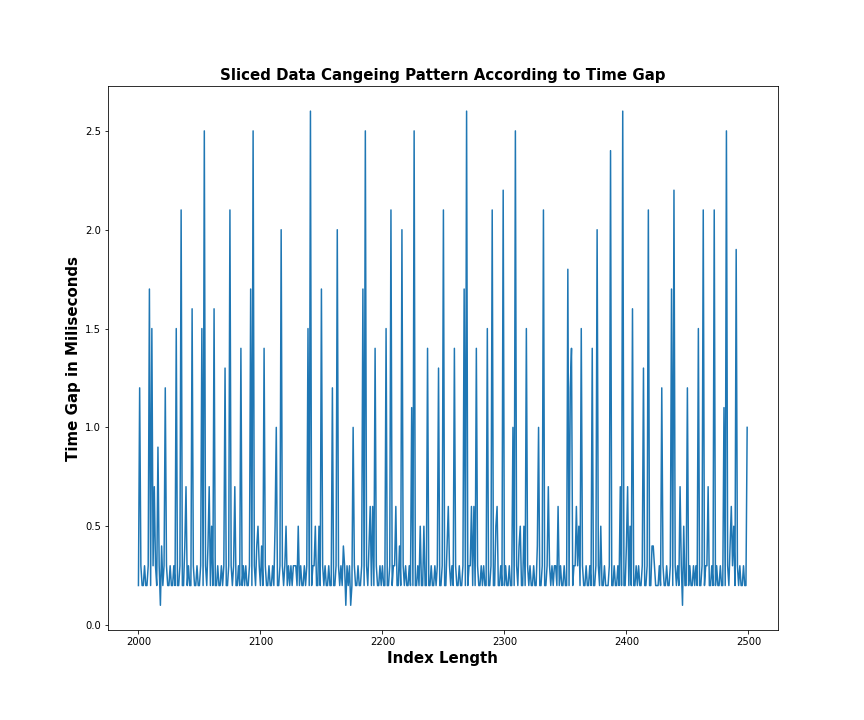

In [12]:
plt.subplots(figsize = (12, 10))
plt.plot(Car_Data_Frame[column][lower_limit:upper_limit])
plt.xlabel("Index Length", fontsize=15,  weight='bold')
plt.ylabel("Time Gap in Miliseconds", fontsize=15,  weight='bold')
plt.title("Sliced Data Cangeing Pattern According to Time Gap", fontsize=15,  weight='bold')

# ID Details

In [13]:
print((colored('All CAN ID List: \n\n', 'blue', attrs=['bold'])),np.unique(Car_Data_Frame.CAN_ID))
print('\n')
print(colored('Total Amount of CAN ID: ', 'red', attrs=['bold']),len(np.unique(Car_Data_Frame.CAN_ID)))

All CAN ID List: 

 ['0018' '0034' '0042' '0043' '0044' '0050' '0080' '0081' '00A0' '00A1'
 '0110' '0120' '0153' '0164' '0165' '018F' '01F1' '0220' '0260' '02A0'
 '02B0' '02C0' '0316' '0329' '0350' '0370' '0382' '0392' '043F' '0440'
 '04B0' '04B1' '04F0' '04F1' '04F2' '0510' '0517' '051A' '0545' '0587'
 '059B' '05A0' '05A2' '05E4' '05F0' '0690']


Total Amount of CAN ID:  46


How Many Times Used This ID

In [14]:
Total_Number_of_Used_this_ID = '0034' #Input CAN ID

In [15]:
print(colored('Total Number of Used this ID: ', 'blue', attrs=['bold']),
      len(Car_Data_Frame[Car_Data_Frame['CAN_ID'] == Total_Number_of_Used_this_ID]))

Total Number of Used this ID:  593


Total ID used under 100 times

In [16]:
'''vx1 = (pd.value_counts(Car_Data_Frame['CAN_ID'])<=2).index
vx2 = (pd.value_counts(Car_Data_Frame['CAN_ID'])<=2).values
vx = pd.concat([pd.DataFrame(vx1), pd.DataFrame(vx2)], ignore_index=True, axis=1)
vx = vx.rename(columns={0:'ID', 1:'XXX'})
vx = vx[vx['XXX']==True]
vx = vx['ID']
print(colored('Total ID used under 3: ', 'blue', attrs=['bold']), len(vx))
print('\n')
print(colored('Total ID used under 3 List:\n\n', 'red', attrs=['bold']), vx.values)'''

"vx1 = (pd.value_counts(Car_Data_Frame['CAN_ID'])<=2).index\nvx2 = (pd.value_counts(Car_Data_Frame['CAN_ID'])<=2).values\nvx = pd.concat([pd.DataFrame(vx1), pd.DataFrame(vx2)], ignore_index=True, axis=1)\nvx = vx.rename(columns={0:'ID', 1:'XXX'})\nvx = vx[vx['XXX']==True]\nvx = vx['ID']\nprint(colored('Total ID used under 3: ', 'blue', attrs=['bold']), len(vx))\nprint('\n')\nprint(colored('Total ID used under 3 List:\n\n', 'red', attrs=['bold']), vx.values)"

Total ID used Over 3 times

In [17]:
v1 = (pd.value_counts(Car_Data_Frame['CAN_ID'])>=2).index
v2 = (pd.value_counts(Car_Data_Frame['CAN_ID'])>=2).values
v = pd.concat([pd.DataFrame(v1), pd.DataFrame(v2)], ignore_index=True, axis=1)
v = v.rename(columns={0:'ID', 1:'XXX'})
v = v[v['XXX']==True]
v = v['ID']
print(colored('Total ID used Over 2 Times: \n\n', 'blue', attrs=['bold']) , len(v))
print('\n')
print(colored('Total ID used Over 2 Times List:\n\n', 'red', attrs=['bold']), v.values)

Total ID used Over 2 Times: 

 46


Total ID used Over 2 Times List:

 ['018F' '0081' '0316' '0080' '0329' '0260' '02A0' '0545' '0370' '043F'
 '0164' '0153' '0440' '0220' '0165' '02B0' '0350' '0382' '04F0' '01F1'
 '04F2' '04B1' '04B0' '0392' '02C0' '00A1' '00A0' '0510' '05E4' '0110'
 '059B' '04F1' '0690' '0587' '0018' '0050' '05F0' '051A' '0120' '0517'
 '0044' '05A2' '05A0' '0042' '0034' '0043']


# ID Wise Analysis On Time Gap

In [18]:
ID_based = []
for x in v:
    ID_based.append(Car_Data_Frame[Car_Data_Frame['CAN_ID']==x])
#------------------#   
Time_Gap_by_own_ID = []
combine_data = []
k = 0
#------------------#
for i in ID_based:
    z = i['Time']
    Time_gap = [0]
    k4 = 1
    lenth = len(z)-1
    #------------------#
    for z1 in z:
        k2 = float(np.array(z)[k4]) - float(z1)
        Time_gap.append(k2)
        if k4 >= lenth:
            break
        k4 = k4 + 1
    Time_Gap_by_own_ID.append(Time_gap)
    #------------------#
for v in range(0,len(ID_based)):
    q = pd.concat([pd.DataFrame(np.array(ID_based[v])), pd.DataFrame(np.array(Time_Gap_by_own_ID[v]))], 
                  ignore_index=True, axis=1)
    q = q.rename(columns={0:'Time', 1: 'Type', 2:'CAN_ID', 3:'DLC', 4:'One', 5:'Two', 6:'Three', 7:'Four', 
                          8:'Five', 9:'Six', 10:'Seven', 11:'Eight', 12:'Full_Data_Time_Gap', 13:'ID_Based_Time_Gap'})
    combine_data.append(q)
    #------------------#

In [19]:
#Filter CAN ID Input
x = '0329'

In [20]:
for i in range(0,len(combine_data)):
    if combine_data[i].CAN_ID[0] == x:
        ID_value_save = combine_data[i]

In [21]:
ID_value_save = ID_value_save[1:]
ID_value_save

,Time,Type,CAN_ID,DLC,One,Two,Three,Four,Five,Six,Seven,Eight,Full_Data_Time_Gap,ID_Based_Time_Gap
1,16.5,Rx,0329,8,0F,B0,80,8C,12,2D,00,10,0.2,9.8
2,26.1,Rx,0329,8,0F,B0,80,8C,12,2D,00,10,0.2,9.6
3,36.3,Rx,0329,8,0F,B0,80,8C,12,2D,00,10,0.2,10.2
4,46.2,Rx,0329,8,40,B0,80,8C,12,2D,00,10,0.2,9.9
5,56.1,Rx,0329,8,40,B0,80,8C,12,2D,00,10,0.2,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59281,592771.0,Rx,0329,8,0F,AF,80,8C,12,2E,00,10,0.2,9.8
59282,592781.2,Rx,0329,8,0F,AF,80,8C,12,2E,00,10,0.2,10.2
59283,592791.3,Rx,0329,8,0F,AF,80,8C,12,2E,00,10,0.3,10.1
59284,592801.0,Rx,0329,8,40,B0,80,8C,12,2E,00,10,0.2,9.7


Text(0.5, 1.0, 'Data Changing Pattern According to Time Gap')

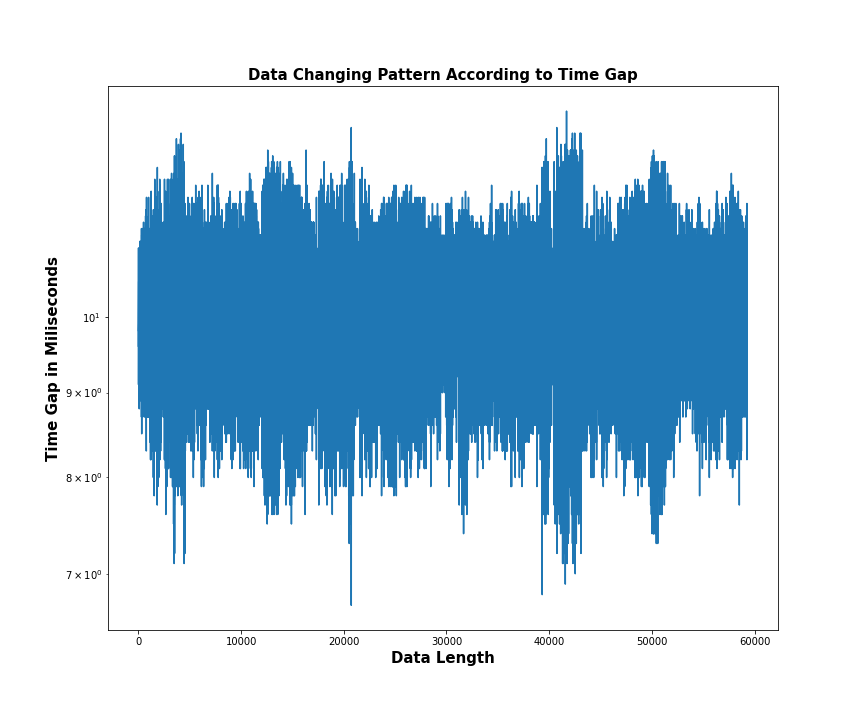

In [22]:
plt.subplots(figsize = (12, 10))
plt.plot(ID_value_save['ID_Based_Time_Gap'][1:])
plt.yscale('log')
plt.xlabel("Data Length", fontsize=15,  weight='bold')
plt.ylabel("Time Gap in Miliseconds", fontsize=15,  weight='bold')
plt.title("Data Changing Pattern According to Time Gap", fontsize=15,  weight='bold')

# Data Sliceing on Specific CAN ID

In [23]:
lower_limit = 4 #Parameter Input lower value
upper_limit = 400 #Parameter Input higher value
column = 'ID_Based_Time_Gap' #Selecting the column

In [24]:
ID_value_save[column][lower_limit:upper_limit]

5       9.9
6      10.0
7      10.2
8      10.0
9       9.8
       ... 
396    10.2
397     9.9
398    10.0
399    10.2
400    10.7
Name: ID_Based_Time_Gap, Length: 396, dtype: float64

Text(0.5, 1.0, 'Sliced Data Cangeing Pattern According to Time Gap on ID')

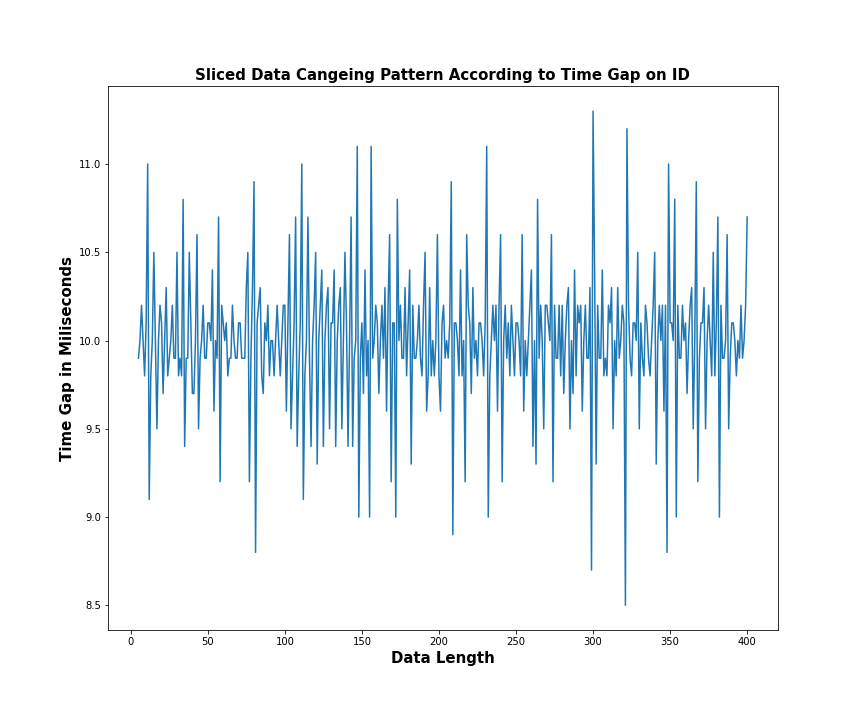

In [25]:
plt.subplots(figsize = (12, 10))
plt.plot(ID_value_save[column][lower_limit:upper_limit])
plt.xlabel("Data Length", fontsize=15,  weight='bold')
plt.ylabel("Time Gap in Miliseconds", fontsize=15,  weight='bold')
plt.title("Sliced Data Cangeing Pattern According to Time Gap on ID", fontsize=15,  weight='bold')

# Payload Analysis ID Wise

In [26]:
print(colored('Total Types of Payload Amount: \n\n', 'blue', attrs=['bold']) , len(np.unique(ID_value_save['Four'])))
print('\n')
print(colored('Total Types of Payload:\n\n', 'red', attrs=['bold']), np.unique(ID_value_save['Four'].str.strip('Full_Payload ')))

Total Types of Payload Amount: 

 2


Total Types of Payload:

 ['0C' '8C']


In [27]:
single_payload = np.unique(ID_value_save['Four'].str.strip('Four'))
payload = single_payload[0] #Input payload Number

In [28]:
payload_filter_data = ID_value_save[ID_value_save['Four'].str.strip('Four') == payload]

In [29]:
payload_filter_data

,Time,Type,CAN_ID,DLC,One,Two,Three,Four,Five,Six,Seven,Eight,Full_Data_Time_Gap,ID_Based_Time_Gap
4785,47852.9,Rx,0329,8,40,B3,80,0C,11,49,3F,10,0.2,10.0
4786,47862.6,Rx,0329,8,84,B3,80,0C,11,49,3F,10,0.2,9.7
4787,47872.9,Rx,0329,8,84,B3,80,0C,11,49,3F,10,0.2,10.3
4788,47883.1,Rx,0329,8,84,B3,80,0C,11,49,3F,10,0.2,10.2
4789,47892.7,Rx,0329,8,84,B3,80,0C,11,49,3F,10,0.3,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58664,586601.1,Rx,0329,8,40,AE,80,0C,11,39,04,10,0.2,11.1
58665,586611.2,Rx,0329,8,40,AE,80,0C,11,39,02,10,0.3,10.1
58666,586621.6,Rx,0329,8,84,AE,80,0C,11,38,00,10,0.3,10.4
58667,586631.2,Rx,0329,8,84,AE,80,0C,11,37,00,10,0.2,9.6


In [30]:
Time_gap_payload = [0]
k4 = 1
lenth = len(payload_filter_data.Time)-1

#payload_filter_data['Time'] = payload_filter_data['Time'].str.extract(r'(\d+)')
strip = np.array(payload_filter_data['Time'])

for k in strip:
    k2 = float(strip[k4]) - float(k)
    Time_gap_payload.append(k2)
    if k4 >= lenth:
        break
    k4 = k4 + 1
Time_gap_payload = pd.DataFrame(Time_gap_payload, columns = ['Time_gap_payload'])

In [31]:
Time_gap_payload

,Time_gap_payload
0,0.0
1,9.7
2,10.3
3,10.2
4,9.6
...,...
35161,11.1
35162,10.1
35163,10.4
35164,9.6


Text(0.5, 1.0, 'Payload According to Time Gap')

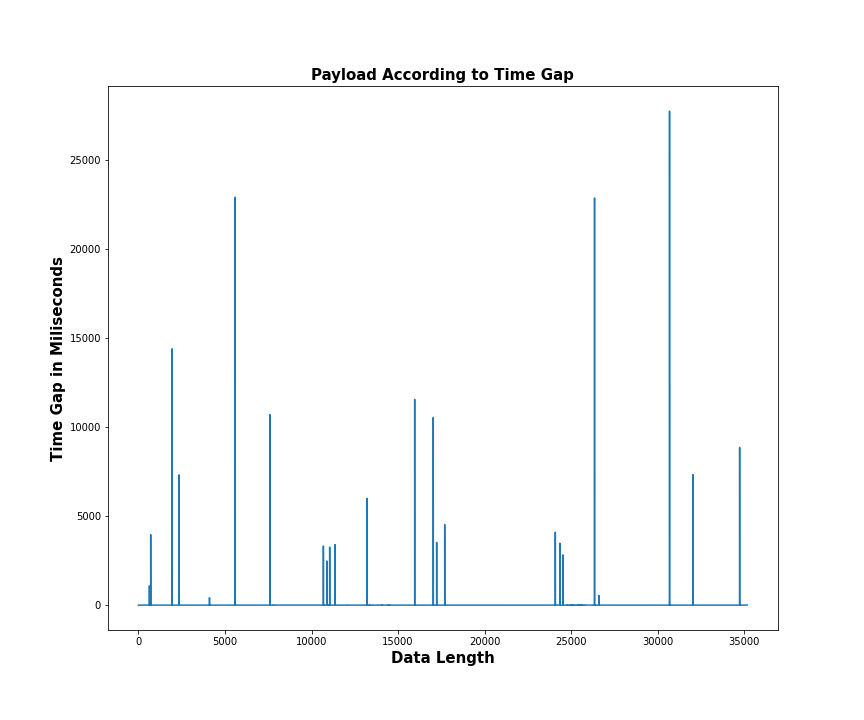

In [32]:
plt.subplots(figsize = (12, 10))
plt.plot(Time_gap_payload['Time_gap_payload'])
plt.xlabel("Data Length", fontsize=15,  weight='bold')
plt.ylabel("Time Gap in Miliseconds", fontsize=15,  weight='bold')
plt.title("Payload According to Time Gap", fontsize=15,  weight='bold')

# PID Analysis ID Wise

In [33]:
Which_PID = 'One' # Input PID Column

In [34]:
print(colored('Total Types of Payload Amount: \n\n', 'blue', attrs=['bold']) , len(np.unique(ID_value_save[Which_PID])))
print('\n')
print(colored('Total Types of Payload:\n\n', 'red', attrs=['bold']), np.unique(ID_value_save[Which_PID].str.strip('Full_Payload ')))

Total Types of Payload Amount: 

 4


Total Types of Payload:

 ['0' '40' '84' 'D7']


In [35]:
PID = '84' # Input PID Payload

In [36]:
PID_filter_data = ID_value_save[ID_value_save['One'].str.strip('One ') == PID]

In [37]:
PID_filter_data

,Time,Type,CAN_ID,DLC,One,Two,Three,Four,Five,Six,Seven,Eight,Full_Data_Time_Gap,ID_Based_Time_Gap
10,106.2,Rx,0329,8,84,B0,80,8C,12,2D,00,10,0.2,10.1
11,117.2,Rx,0329,8,84,B0,80,8C,12,2D,00,10,0.3,11.0
12,126.3,Rx,0329,8,84,B0,80,8C,12,2D,00,10,0.3,9.1
13,136.1,Rx,0329,8,84,B0,80,8C,12,2D,00,10,0.2,9.8
14,146.1,Rx,0329,8,84,B0,80,8C,12,2D,00,10,0.2,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59267,592630.2,Rx,0329,8,84,AF,80,8C,12,2E,00,10,0.2,9.1
59268,592641.1,Rx,0329,8,84,AF,80,8C,12,2E,00,10,0.3,10.9
59269,592651.0,Rx,0329,8,84,AF,80,8C,12,2E,00,10,0.2,9.9
59270,592661.1,Rx,0329,8,84,AF,80,8C,12,2E,00,10,0.3,10.1


In [38]:
#PID Payload Timegap
Time_gap_payload = [0]
k4 = 1
lenth = len(payload_filter_data.Time)-1

PID_filter_data[Which_PID] = PID_filter_data[Which_PID].str.extract(r'(\d+)')

for k in strip:
    k2 = float(strip[k4]) - float(k)
    Time_gap_payload.append(k2)
    if k4 >= lenth:
        break
    k4 = k4 + 1
Time_gap_PID = pd.DataFrame(Time_gap_payload, columns = ['Time_gap_PID'])

<ipython-input-38-cc0effc5938a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PID_filter_data[Which_PID] = PID_filter_data[Which_PID].str.extract(r'(\d+)')


In [39]:
Time_gap_PID

,Time_gap_PID
0,0.0
1,9.7
2,10.3
3,10.2
4,9.6
...,...
35161,11.1
35162,10.1
35163,10.4
35164,9.6


Text(0.5, 1.0, 'PID According to Time Gap')

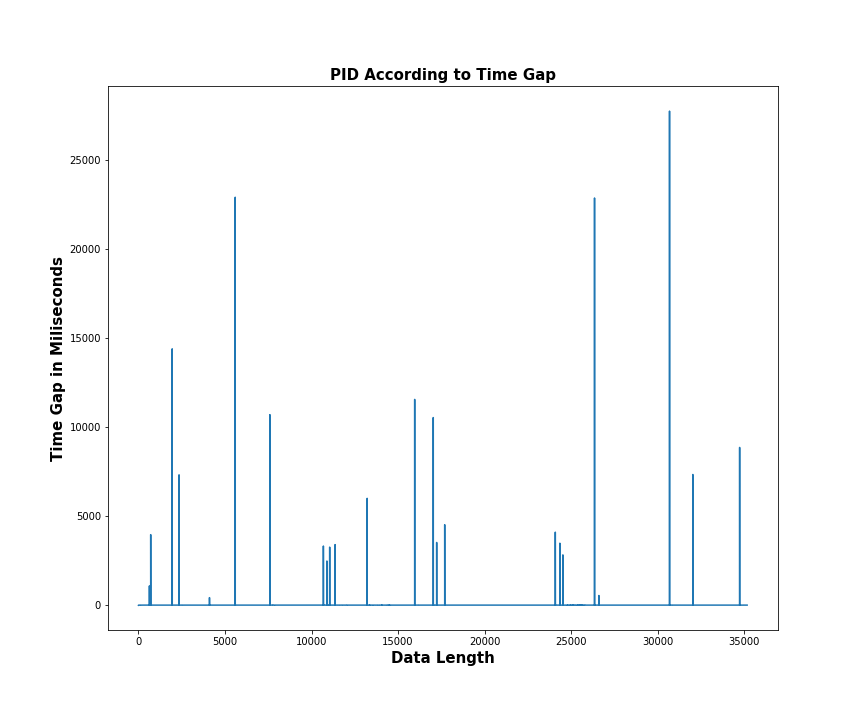

In [40]:
plt.subplots(figsize = (12, 10))
plt.plot(Time_gap_PID['Time_gap_PID'])
plt.xlabel("Data Length", fontsize=15,  weight='bold')
plt.ylabel("Time Gap in Miliseconds", fontsize=15,  weight='bold')
plt.title("PID According to Time Gap", fontsize=15,  weight='bold')

# Time Slice Analysis

In [41]:
input_time_slot = 2000 #1000 milisecond is 1 second

In [42]:
def find_border(df,start_in):
    border = float(df[start_in]) + input_time_slot
    for i in range(start_in, len(df)):
        if float(df[i]) >= border:
            return i
        if i == len(df) - 1:
            return i+1
            break
            
Split_by_time = []
start_in = 0
temp = Car_Data_Frame['Time']
last_in = len(temp)-1

while start_in < last_in:
    t = find_border(temp, start_in)
    Split_by_time.append(Car_Data_Frame[start_in:t])
    start_in = t + 1
print(colored('Total segment by Input time: \n\n', 'blue', attrs=['bold']) ,len(Split_by_time))

Total segment by Input time: 

 297


In [43]:
Input_segment = 0

In [44]:
Output_time_segment = Split_by_time[Input_segment]
Output_time_segment

,Time,Type,CAN_ID,DLC,Data0,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Full_Data_Time_Gap
0,2.1,Rx,0018,8,00,00,00,60,00,20,20,00,NaN
1,2.3,Rx,0165,8,10,98,81,00,00,00,00,09,0.2
2,2.5,Rx,02B0,5,35,FD,0B,07,80,None,None,None,0.2
3,3.0,Rx,04B1,8,AA,1E,29,A8,00,00,00,99,0.5
4,3.3,Rx,0164,8,00,08,01,00,00,00,07,0E,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285,2000.5,Rx,043F,8,11,55,60,FF,7C,00,00,00,2.5
4286,2000.7,Rx,0370,8,FF,20,10,88,FF,00,00,10,0.2
4287,2001.0,Rx,0440,8,FF,41,00,00,FF,00,00,00,0.3
4288,2001.4,Rx,04F2,8,A0,00,B0,28,00,00,00,AA,0.4


In [45]:
Output_time_segment_column = "CAN_ID"

In [46]:
Output_time_segment_column = Output_time_segment['CAN_ID']
Output_time_segment_column

0       0018
1       0165
2       02B0
3       04B1
4       0164
        ... 
4285    043F
4286    0370
4287    0440
4288    04F2
4289    0018
Name: CAN_ID, Length: 4290, dtype: object

# Frequency Domain Analysis

Fourier Transform

In [47]:
Input_column = 'CAN_ID'

In [48]:
from sklearn.preprocessing import LabelEncoder
#Cettegorical Value transfer into Number
labelecoder_df = LabelEncoder()
data_scaled = pd.DataFrame(Output_time_segment[Input_column]).apply(LabelEncoder().fit_transform)
data_scaled = np.array(data_scaled)
data_scaled = data_scaled.astype(np.float32)

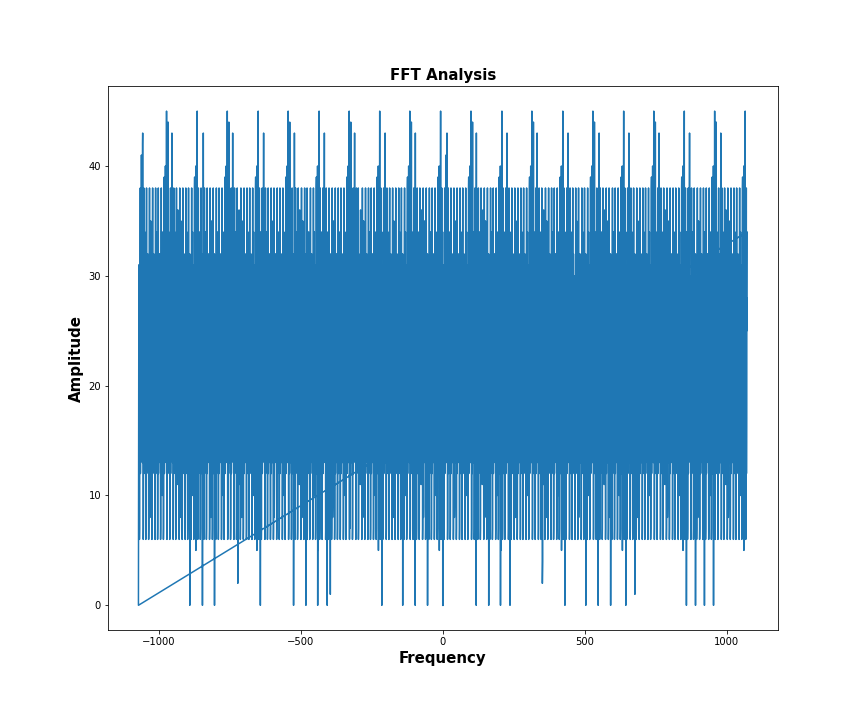

In [49]:
from scipy.fft import fft, fftfreq

DURATION = input_time_slot/1000  # Seconds
SAMPLE_RATE = abs(len(Output_time_segment_column)/DURATION)  # Hertz

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(data_scaled)
xf = fftfreq(int(N), 1 / SAMPLE_RATE)

plt.subplots(figsize = (12, 10))
plt.plot(xf, np.abs(yf))
plt.xlabel("Frequency", fontsize=15,  weight='bold')
plt.ylabel("Amplitude", fontsize=15,  weight='bold')
plt.title("FFT Analysis", fontsize=15,  weight='bold')
plt.show()

Wavelet Transfrom

In [50]:
for family in pywt.families():
    print(family, ' : ',pywt.wavelist(family))

haar  :  ['haar']
db  :  ['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38']
sym  :  ['sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']
coif  :  ['coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17']
bior  :  ['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8']
rbio  :  ['rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5

In [51]:
#####Input Bar#####

Input_Data = data_scaled
Wvaelet_Family = 'db2'
Label = 2
Mode = 'periodic'

In [52]:
Approximation_Coefficients = []
Detail_Coefficient = []

Approximation_Coefficients += [f'cAs{x+1}' for x in range(Label-1)]
Detail_Coefficient += [f'cDs{x}' for x in range(Label)]
coff = Approximation_Coefficients + Detail_Coefficient

coeffs = pywt.wavedec(Input_Data, Wvaelet_Family, level = Label, mode = Mode)

for i1, i2 in zip(coff, coeffs):
    locals()[i1] = i2
    
print(colored('Detail Coefficient: ', 'blue', attrs=['bold']) ,Detail_Coefficient)
print(colored('\n\nApproximation Coeflist ficients: ', 'red', attrs=['bold']) ,Approximation_Coefficients)

Detail Coefficient:  ['cDs0', 'cDs1']


Approximation Coeflist ficients:  ['cAs1']


C:\Users\rezan\anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 2 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [53]:
len(coff)

3

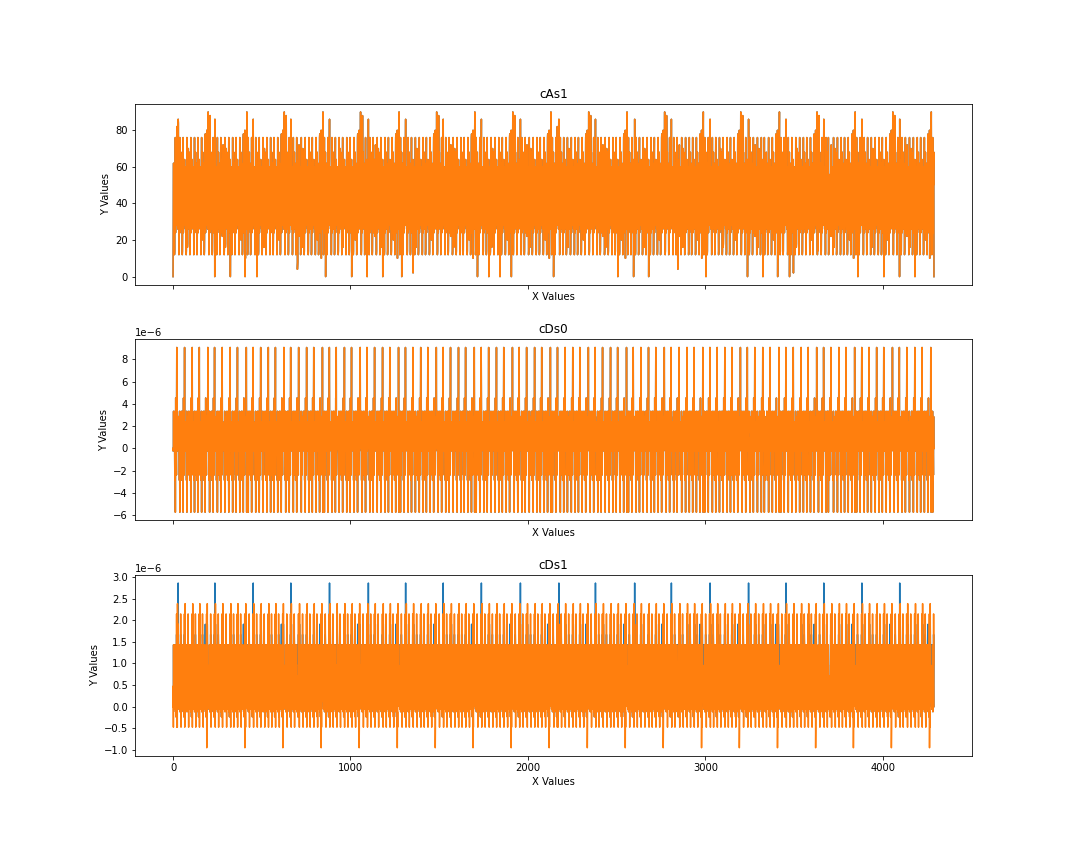

In [58]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(len(coff), sharex='col', sharey='row', figsize=(15, 12))

for z1, z2 in zip(coff, range(len(coff))):

    ax[z2].plot(locals()[z1])
    ax[z2].set(xlabel='X Values', ylabel='Y Values', title= z1 )

    plt.subplots_adjust(wspace=1.2, hspace=0.3)

plt.show()

Spectrogram

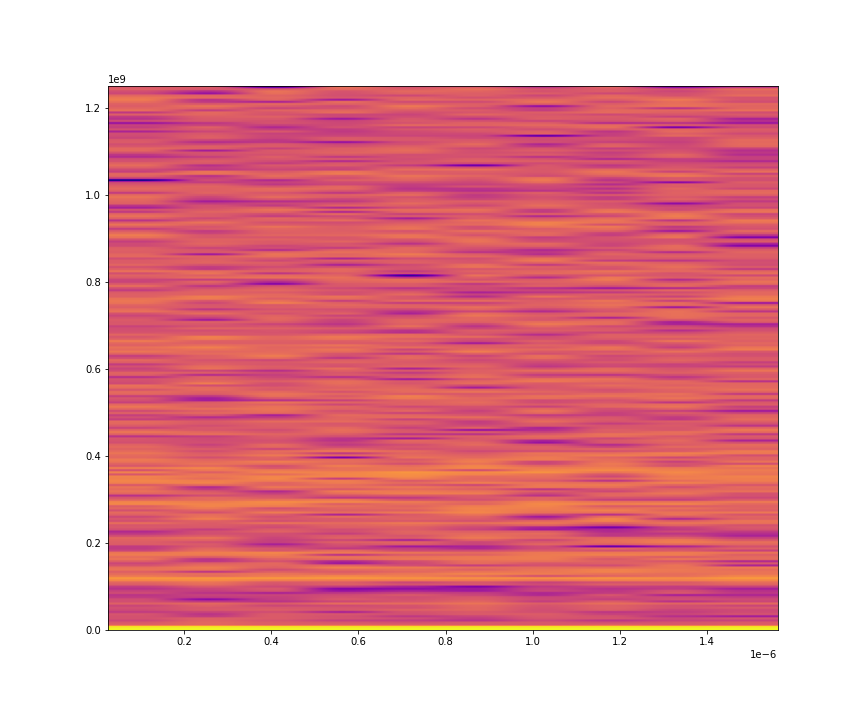

In [59]:
plt.subplots(figsize = (12, 10))
Pxx, freqs, bins, im = plt.specgram(Input_Data.reshape(Input_Data.shape[0]), NFFT=512, Fs=2.5e9, cmap='plasma')

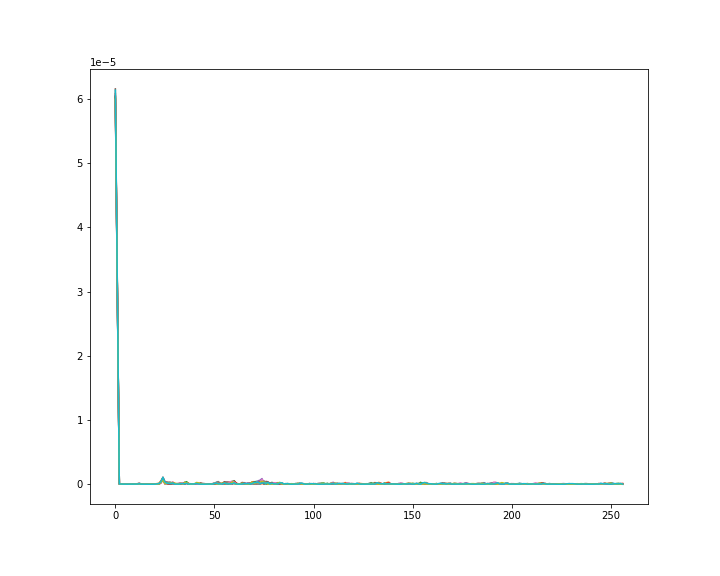

In [56]:
plt.figure(figsize=(10,8))
plt.plot(Pxx)

<ipython-input-57-53cb4188a254>:13: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


NameError: name 'freq1' is not defined

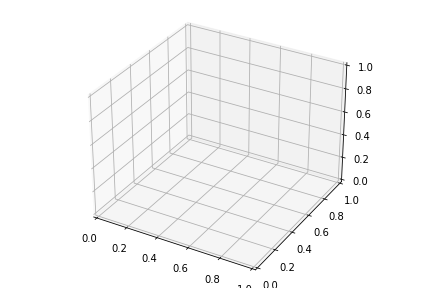

In [57]:
# creating 3d plot using matplotlib 
# in python
  
# for creating a responsive plot
%matplotlib widget
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
  
# creating figure
fig = plt.figure()
ax = Axes3D(fig)
  
# creating the plot
plot_geeks = ax.plot(freq1, time1, Pxx.reshape(Pxx.shape[0]*Pxx.shape[1]), color='green')
  
# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
  
# displaying the plot
plt.show()

In [ ]:
Pxx.shape

In [ ]:
np.array(Pxx.reshape(Pxx.shape[0]*Pxx.shape[1]))

In [ ]:
freqs.shape

In [ ]:
bins.shape

In [ ]:
bins

In [ ]:
freqs

In [ ]:
Pxx.shape